# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [23]:
import numpy as np
import pandas as pd

N = np.logspace (1, 5, 5) 
table = pd.DataFrame(columns=["Aproximación f1", "Error f1","Aproximación f2", "Error f2"], index=N)
table


def montecarlo (f, N, a, b):
    u = np.random.uniform (a, b, N)
    return np.mean ( f(u) )*(b-a)

def f1(x):
    return (np.exp(x))*(np.log(x))

def f2(x):
    return (np.sin(x))*(np.log(x))


for i in N:
    table.loc[i, "Aproximación f1"] = montecarlo (f1, int(i), 1, 3)
for i in N:
    table.loc[i, "Aproximación f2"] = montecarlo (f2, int(i), 1, 3)

table["Error f1"] = np.abs(14.0275) - table["Aproximación f1"]
table["Error f2"] = np.abs(0.869844) - table["Aproximación f2"] 
table

,Aproximación f1,Error f1,Aproximación f2,Error f2
10.0,10.015031,4.012469,0.959499,-0.089655
100.0,14.131916,-0.104416,0.912759,-0.042915
1000.0,14.254059,-0.226559,0.862704,0.00714
10000.0,14.106719,-0.079219,0.872418,-0.002574
100000.0,14.072518,-0.045018,0.869688,0.000156


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [24]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

def montecarlo2 (region, ax, bx, ay, by, N):
    x = np.random.uniform (ax,bx, N)
    y = np.random.uniform (ay,by, N)
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

def bernoulli (x,y):
    return (x**2 + 2*y**2 <= -2*x + 8*y - 7)

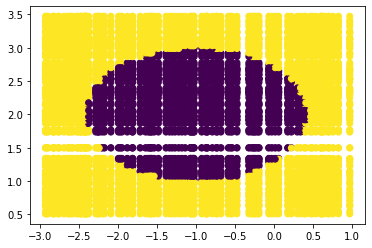

In [25]:
x = np.random.uniform(-3,1,100)
y = np.random.uniform(0.5,3.5,100)
X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter (X,Y, c = ~bernoulli(X,Y))

In [30]:
tabla = pd.DataFrame(columns =["Aproximación", "Error"], index = N)
tabla

,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [36]:

ax = -3
bx = 1
ay = 0.5
by = 3.5

AR = (bx-ax)*(by-ay)

for i in N: 
    tabla.loc[i, "Aproximación"]= montecarlo2(bernoulli, ax,bx,ay,by, int(i))
    AD = tabla["Aproximación"][i]
    c_rel = np.sqrt((1-(AD/AR))/(AD/AR))
    tabla.loc[i,"Error"] = c_rel
tabla

,Aproximación,Error
10.0,4.8,1.224745
100.0,5.16,1.151339
1000.0,4.248,1.350873
10000.0,4.4736,1.297075
100000.0,4.43772,1.305408


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.